In [97]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# %pylab inline

\gamma =0.5, 0.9, 0.99, 0.5 is best

AR@1 FR@100&20, AR is better

In [44]:
file_list = ['./log/index_'+file+'.csv' for file in [
    "message_2016-6-8_2130_AR1.log",  # G 0.5
    "message_2016-6-8_2130_AR1_G9.log",
    "message_2016-6-8_2130_AR1_G99_1.log",
#     "message_2016-6-8_2130_AR1_G99_2.log",
#     "message_2016-6-8_2130_AR1_G99_3.log",
#     "message_2016-6-8_2130_AR1_G99_4.log",
#     "message_2016-6-8_2130_AR1_G99_5.log",
#     "message_2016-6-8_2130_AR1_G99_6.log",
#     "message_2016-6-8_2130_AR1_G99_7.log",
    "message_2016-6-8_2130_FR20.log",
    "message_2016-6-8_2130_FR100_G9.log",
    "message_2016-6-8_2130_FR100_G99_1.log",
    "message_2016-6-8_2130_FR100_G99_2.log",
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-8_2130_AR1.log.csv
./log/index_message_2016-6-8_2130_AR1_G9.log.csv
./log/index_message_2016-6-8_2130_AR1_G99_1.log.csv
./log/index_message_2016-6-8_2130_FR20.log.csv
./log/index_message_2016-6-8_2130_FR100_G9.log.csv
./log/index_message_2016-6-8_2130_FR100_G99_1.log.csv
./log/index_message_2016-6-8_2130_FR100_G99_2.log.csv


In [45]:
ts_name = file_list
styles = ['-']*9
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

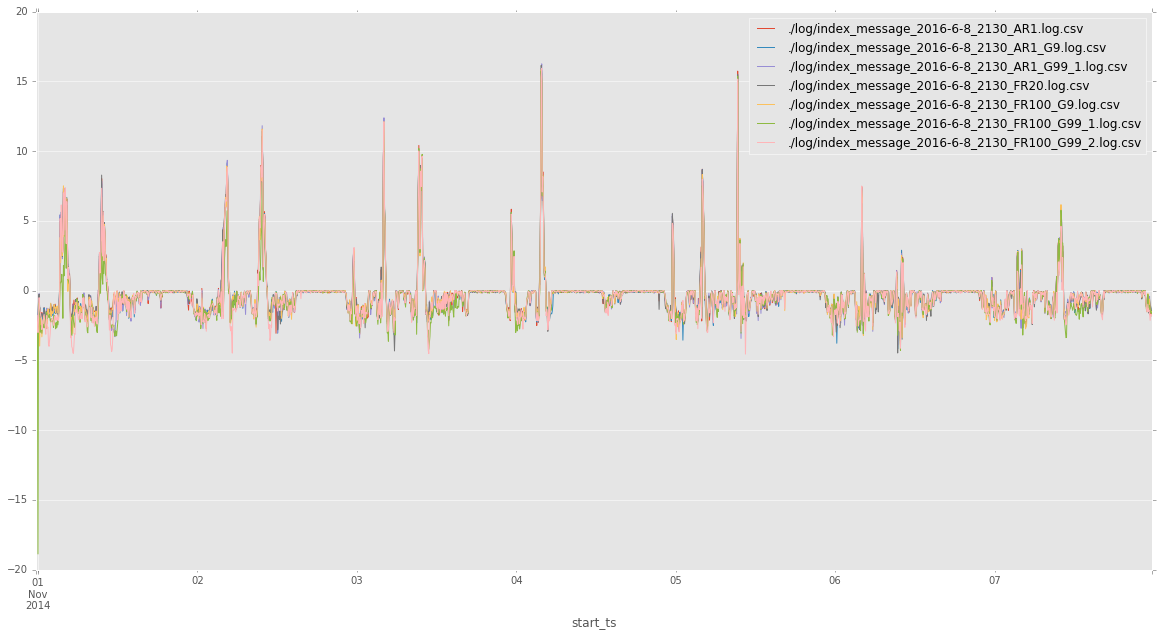

In [47]:
start = pd.to_datetime("2014-11-01 15:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.total_reward.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

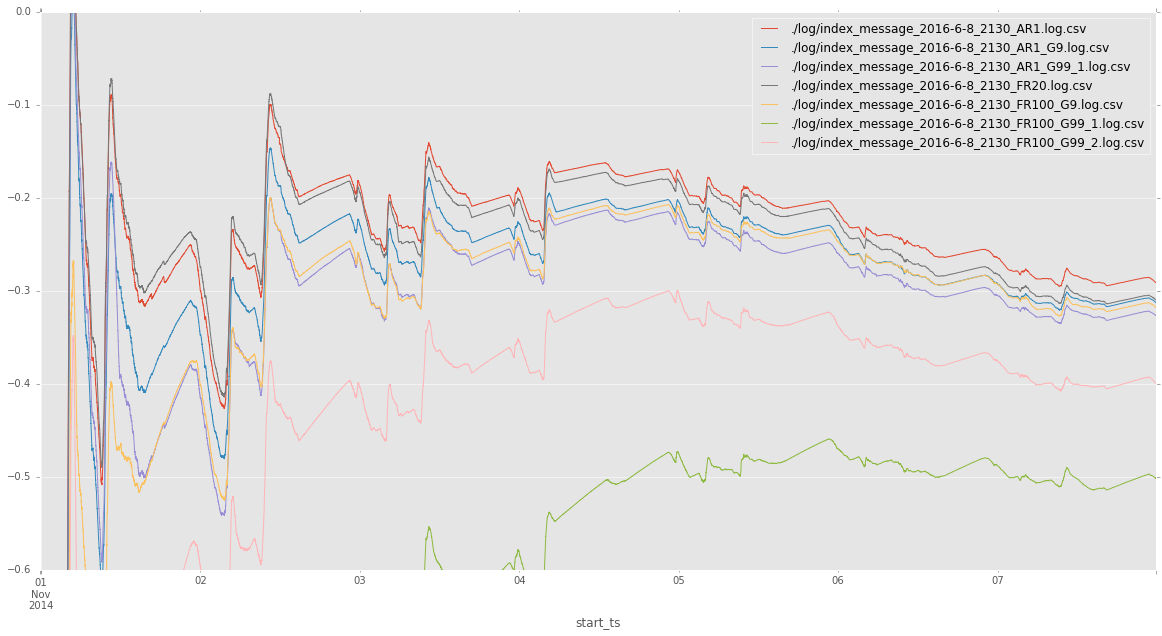

In [49]:
start = pd.to_datetime("2014-11-03 0:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
    df = df
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
            ylim=(-0.6, 0),
           )

Phi10 is better than Phi1

In [67]:
file_list = ['./log/index_'+file+'.csv' for file in [
"message_2016-6-8_2130_P1_2.log",
"message_2016-6-8_2130_P1_3.log",
"message_2016-6-8_2130_P1.log",
"message_2016-6-8_2130_P10_1.log",
# "message_2016-6-8_2130_P100_1.log",
# "message_2016-6-8_2130_P100_2.log",
# "message_2016-6-8_2130_P100_3.log",
# "message_2016-6-8_2130_P200_1.log",
# "message_2016-6-8_2130_P200_2.log",
# "message_2016-6-8_2130_P200_3.log",
# "message_2016-6-8_2130_AR1_G99_1.log",
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-8_2130_P10_1.log.csv
./log/index_message_2016-6-8_2130_P10_3.log.csv
./log/index_message_2016-6-8_2130_P1_2.log.csv
./log/index_message_2016-6-8_2130_P1_3.log.csv
./log/index_message_2016-6-8_2130_P1.log.csv


In [68]:
ts_name = file_list
styles = ['-']*11
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

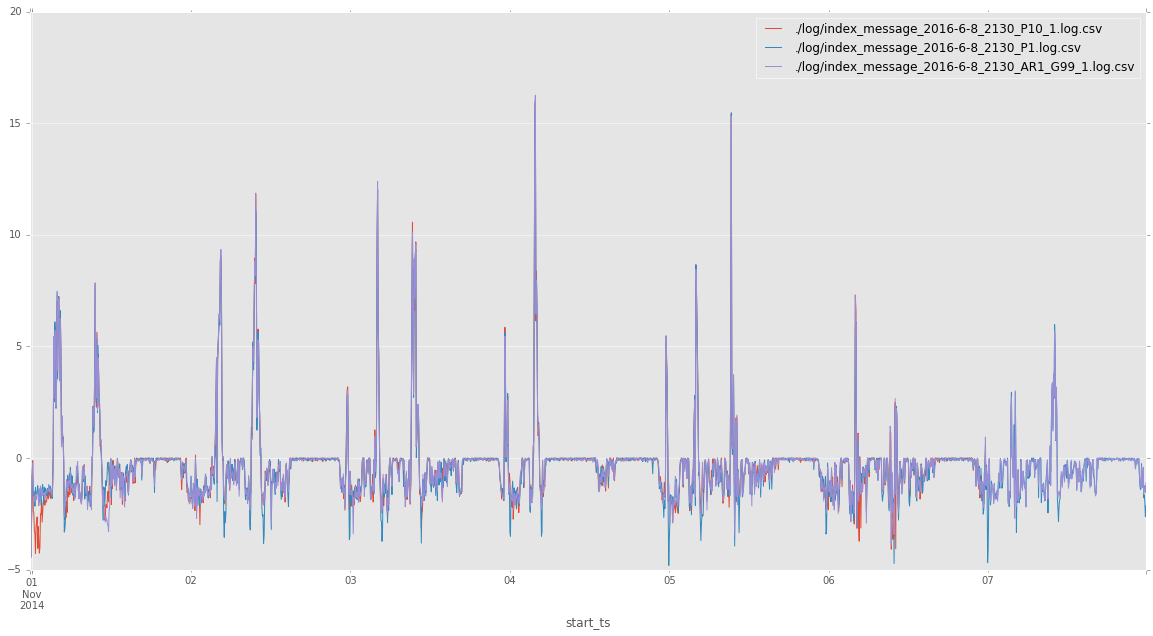

In [65]:
start = pd.to_datetime("2014-11-01 15:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.total_reward.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

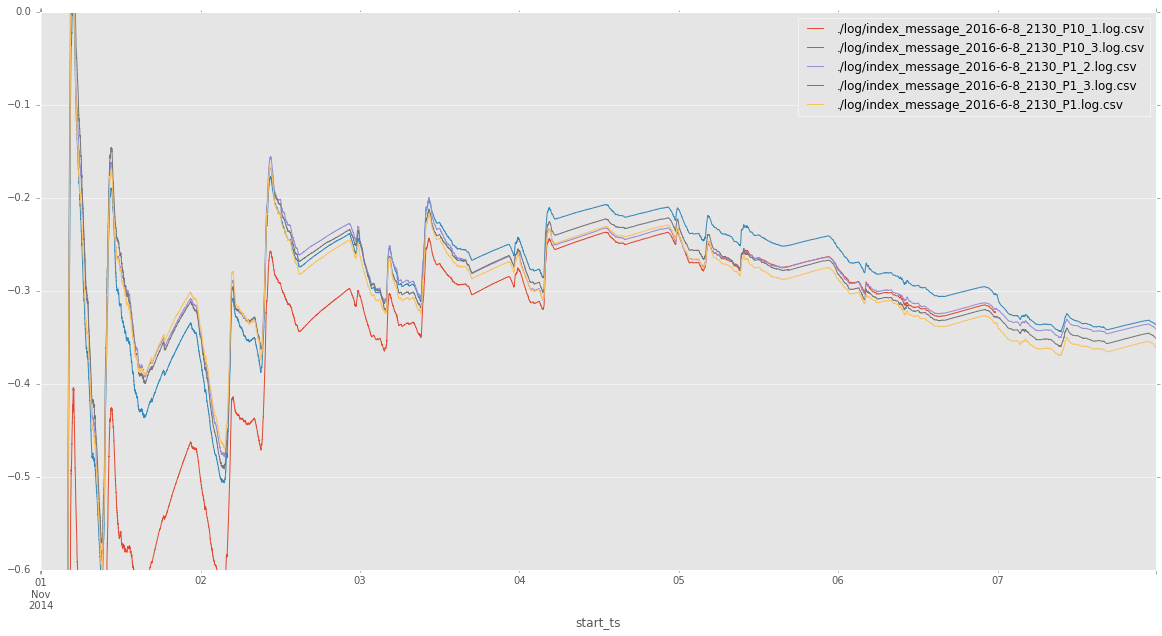

In [69]:
start = pd.to_datetime("2014-11-03 0:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
    df = df
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
            ylim=(-0.6, 0),
           )

Phi10 is better than Phi1

In [98]:
file_list = ['./log/index_'+file+'.csv' for file in [
"message_2016-6-8_XXX.log",
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-8_XXX.log.csv


In [99]:
ts_name = file_list
styles = ['-']*11
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

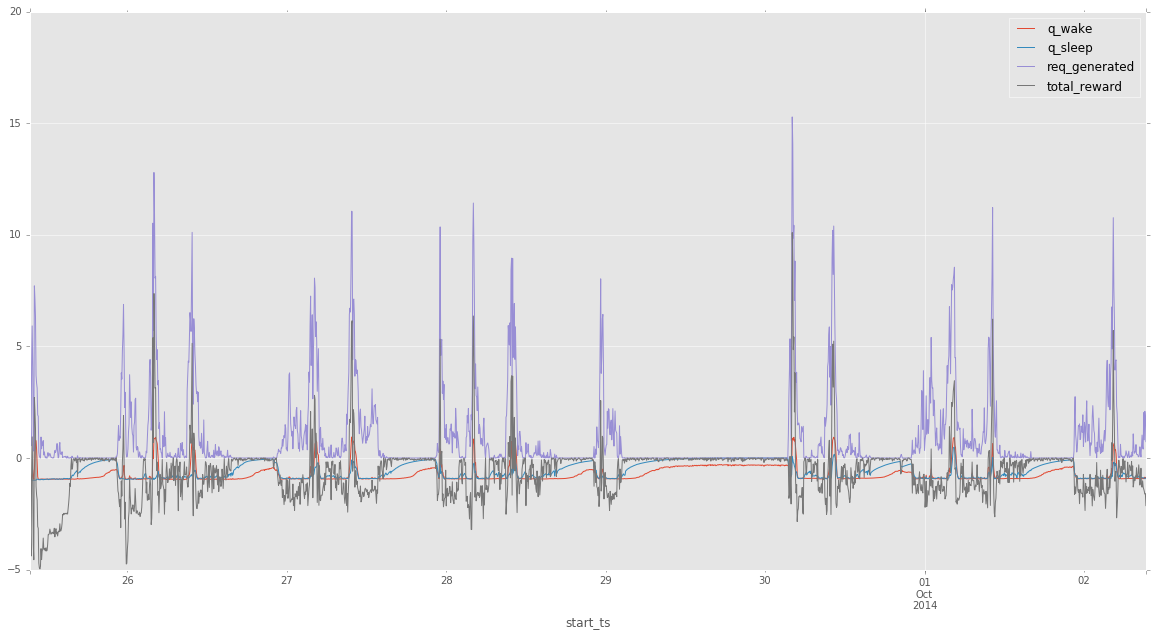

In [81]:
start = pd.to_datetime("2014-11-01 15:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df[['q_wake','q_sleep','req_generated','total_reward']].resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

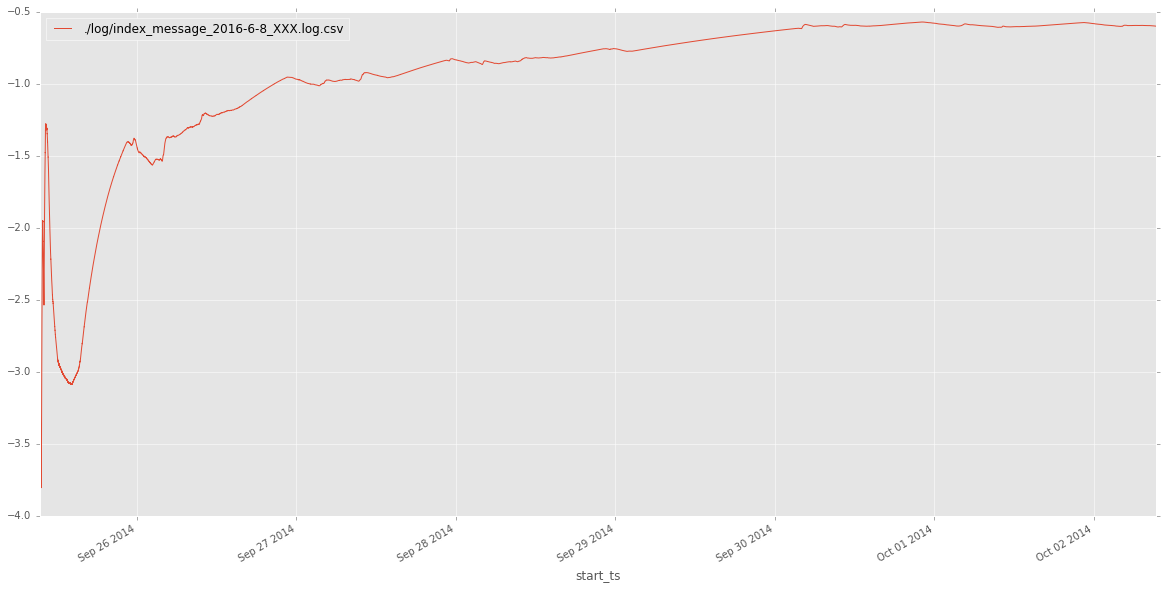

In [74]:
start = pd.to_datetime("2014-11-03 0:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
    df = df
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
#             ylim=(-0.6, 0),
           )

NoAgent

In [95]:
file_list = ['./log/index_'+file+'.csv' for file in [
        "message_2016-6-9_1140_N1.log",
        "message_2016-6-8_2130_AR1_G99_1.log",
        "message_2016-6-8_2130_AR1_G9.log",
        "message_2016-6-8_2130_AR1.log",  # G 0.5
        
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]
ts_name = file_list
styles = ['-']*11
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

./log/index_message_2016-6-9_1140_N1.log.csv
./log/index_message_2016-6-8_2130_AR1_G99_1.log.csv
./log/index_message_2016-6-8_2130_AR1_G9.log.csv
./log/index_message_2016-6-8_2130_AR1.log.csv


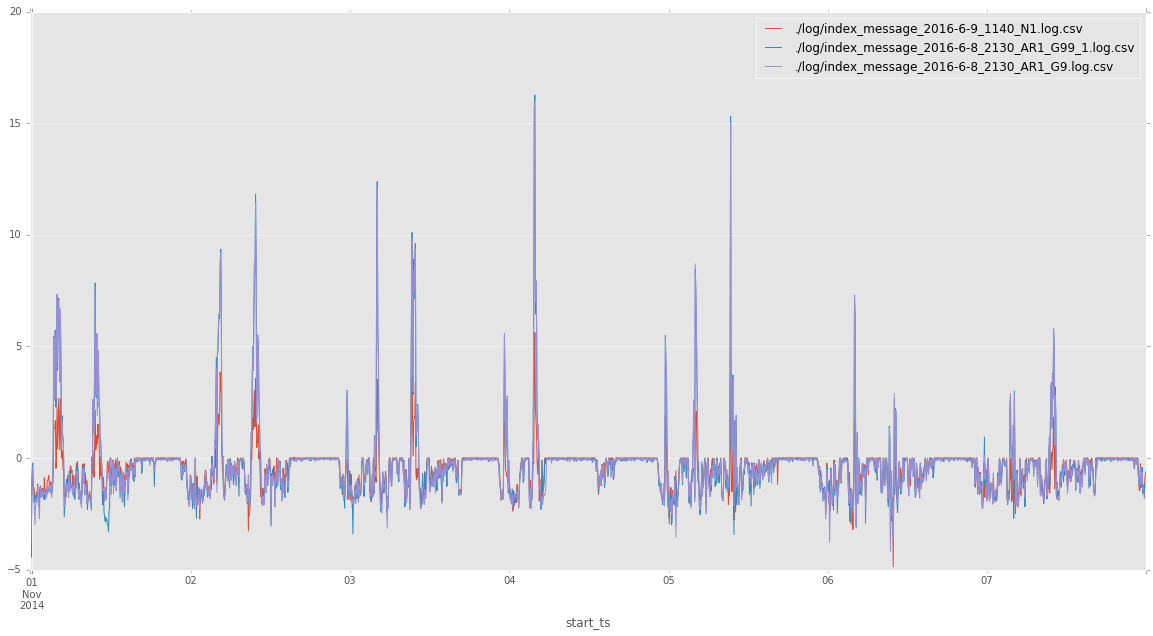

In [93]:
start = pd.to_datetime("2014-11-01 15:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df['total_reward'].resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

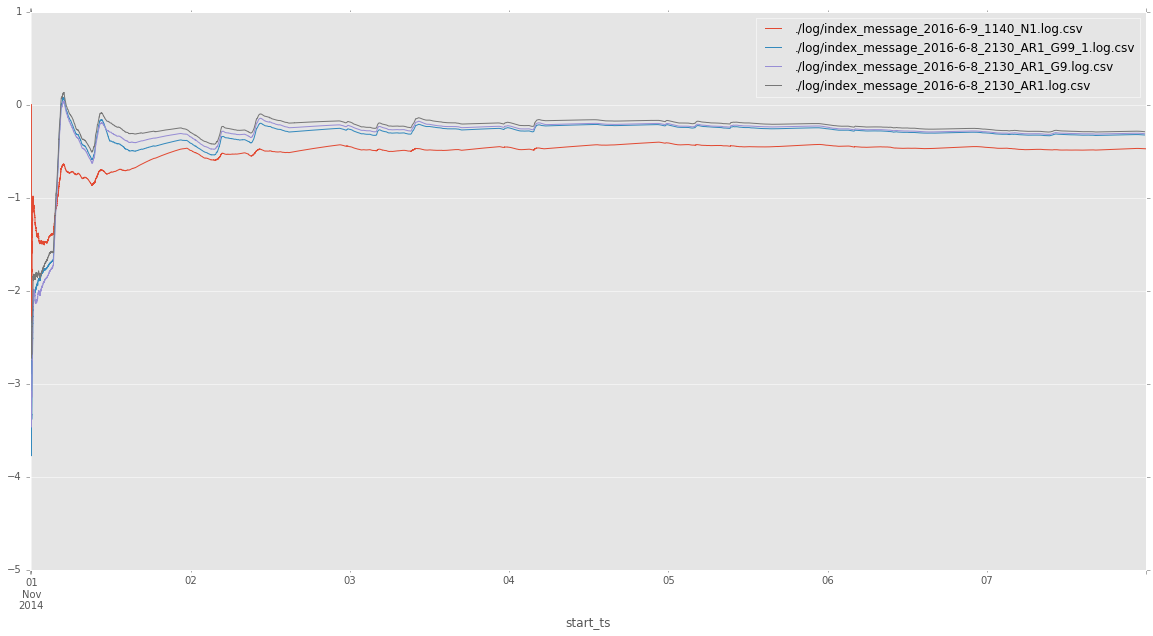

In [96]:
start = pd.to_datetime("2014-11-03 0:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
    df = df
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
#             ylim=(-1, 0),
           )